# UIDAI Data Hackathon 2026  
## Notebook 05: Visualisation & Storytelling

This notebook generates final visualisations used in the
UIDAI Hackathon submission report and presentation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_context("talk")
plt.style.use("default")

In [2]:
BASE_PATH = "/Users/aaronrao/Desktop/projects/UIDAI_Aadhaar_Data_Insights"

DATA_PATH = os.path.join(BASE_PATH, "data/processed")
OUTPUT_PATH = os.path.join(BASE_PATH, "outputs/figures")

os.makedirs(OUTPUT_PATH, exist_ok=True)

In [3]:
biometric_df = pd.read_csv(os.path.join(DATA_PATH, "biometric_cleaned.csv"))
demographic_df = pd.read_csv(os.path.join(DATA_PATH, "demographic_cleaned.csv"))
enrolment_df = pd.read_csv(os.path.join(DATA_PATH, "enrolment_cleaned.csv"))

/var/folders/qs/5q2_h5j931g_w8krqy_fjh640000gn/T/ipykernel_24711/2318948310.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  biometric_df = pd.read_csv(os.path.join(DATA_PATH, "biometric_cleaned.csv"))
/var/folders/qs/5q2_h5j931g_w8krqy_fjh640000gn/T/ipykernel_24711/2318948310.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  demographic_df = pd.read_csv(os.path.join(DATA_PATH, "demographic_cleaned.csv"))
/var/folders/qs/5q2_h5j931g_w8krqy_fjh640000gn/T/ipykernel_24711/2318948310.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  enrolment_df = pd.read_csv(os.path.join(DATA_PATH, "enrolment_cleaned.csv"))


### Plot 1: Age-wise Aadhaar Enrolment Composition

In [4]:
import matplotlib.ticker as ticker

def format_lakhs(x, pos):
    return f"{x/1e5:.1f} L"

def format_crores(x, pos):
    return f"{x/1e7:.2f} Cr"

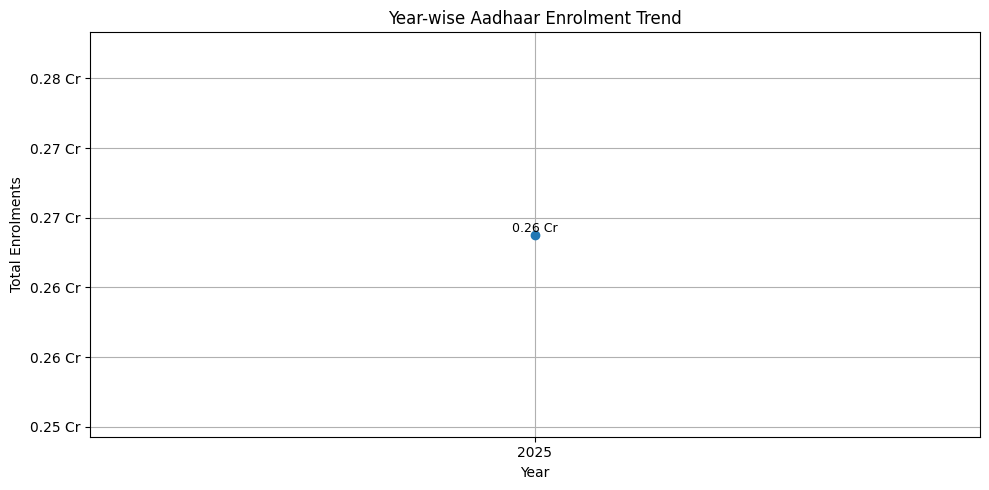

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

OUTPUT_PATH = "/Users/aaronrao/Desktop/projects/UIDAI_Aadhaar_Data_Insights/outputs/figures"
os.makedirs(OUTPUT_PATH, exist_ok=True)

def format_crores(x, pos):
    return f"{x/1e7:.2f} Cr"

yearly_enrol = enrolment_df.groupby("year")["total_enrolments"].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    yearly_enrol["year"],
    yearly_enrol["total_enrolments"],
    marker="o",
    linewidth=2
)

ax.set_title("Year-wise Aadhaar Enrolment Trend")
ax.set_xlabel("Year")
ax.set_ylabel("Total Enrolments")
ax.set_xticks(yearly_enrol["year"])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_crores))
ax.grid(True)

# Annotate values
for x, y in zip(yearly_enrol["year"], yearly_enrol["total_enrolments"]):
    ax.text(x, y, f"{y/1e7:.2f} Cr", ha="center", va="bottom", fontsize=9)

# 🔥 SAVE USING FIG (NOT plt)
fig.tight_layout()
fig.savefig(
    os.path.join(OUTPUT_PATH, "enrolment_trend_yearly.png"),
    dpi=300,
    bbox_inches="tight"
)

plt.show()

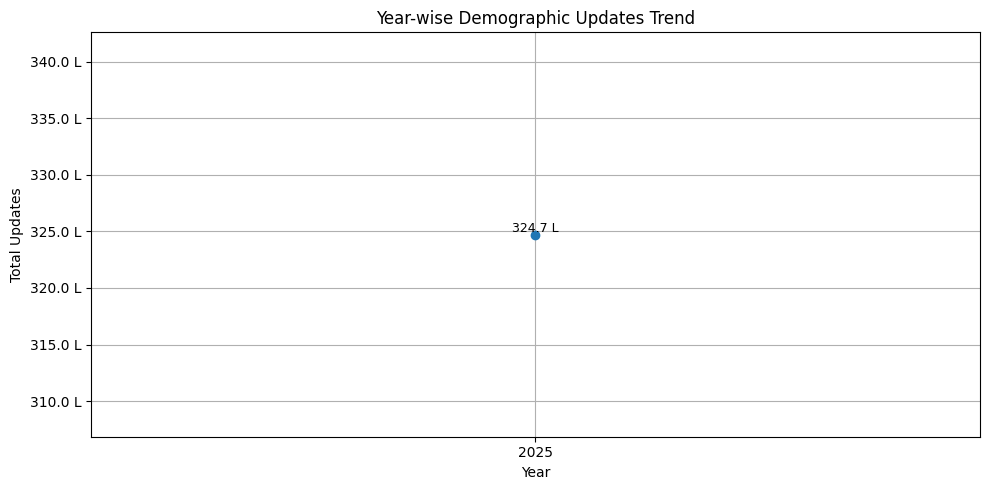

In [6]:
def format_lakhs(x, pos):
    return f"{x/1e5:.1f} L"

demo_yearly = demographic_df.groupby("year")["total_demographic_updates"].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    demo_yearly["year"],
    demo_yearly["total_demographic_updates"],
    marker="o",
    linewidth=2
)

ax.set_title("Year-wise Demographic Updates Trend")
ax.set_xlabel("Year")
ax.set_ylabel("Total Updates")
ax.set_xticks(demo_yearly["year"])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_lakhs))
ax.grid(True)

for x, y in zip(demo_yearly["year"], demo_yearly["total_demographic_updates"]):
    ax.text(x, y, f"{y/1e5:.1f} L", ha="center", va="bottom", fontsize=9)

fig.tight_layout()
fig.savefig(
    os.path.join(OUTPUT_PATH, "demographic_updates_trend.png"),
    dpi=300,
    bbox_inches="tight"
)

plt.show()

In [7]:
import os

OUTPUT_PATH = "/Users/aaronrao/Desktop/projects/UIDAI_Aadhaar_Data_Insights/outputs/figures"
os.makedirs(OUTPUT_PATH, exist_ok=True)

In [8]:
plt.savefig(os.path.join(OUTPUT_PATH, "enrolment_trend_yearly.png"))
plt.show()

<Figure size 640x480 with 0 Axes>

In [9]:
plt.tight_layout()
plt.savefig(
    os.path.join(OUTPUT_PATH, "enrolment_trend_yearly.png"),
    dpi=300,
    bbox_inches="tight"
)
plt.show()

<Figure size 640x480 with 0 Axes>

In [10]:
os.listdir(OUTPUT_PATH)

['enrolment_trend_yearly.png',
 'enrolment_vs_biometric.png',
 'biometric_updates_age.png',
 'enrolment_age_composition.png',
 'demographic_updates_trend.png']

In [11]:
plt.tight_layout()
plt.savefig(
    os.path.join(OUTPUT_PATH, "demographic_updates_trend.png"),
    dpi=300,
    bbox_inches="tight"
)
plt.show()

<Figure size 640x480 with 0 Axes>

In [12]:
dpi=300
bbox_inches="tight"

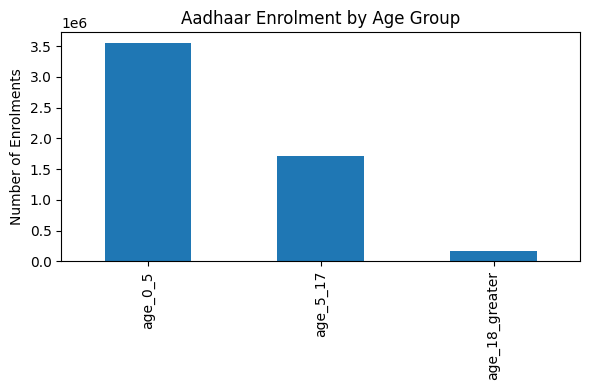

In [13]:
age_totals = enrolment_df[["age_0_5", "age_5_17", "age_18_greater"]].sum()

age_totals.plot(kind="bar", figsize=(6, 4))
plt.title("Aadhaar Enrolment by Age Group")
plt.ylabel("Number of Enrolments")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, "enrolment_age_composition.png"))
plt.show()

### Plot 2: Year-wise Enrolment Trends

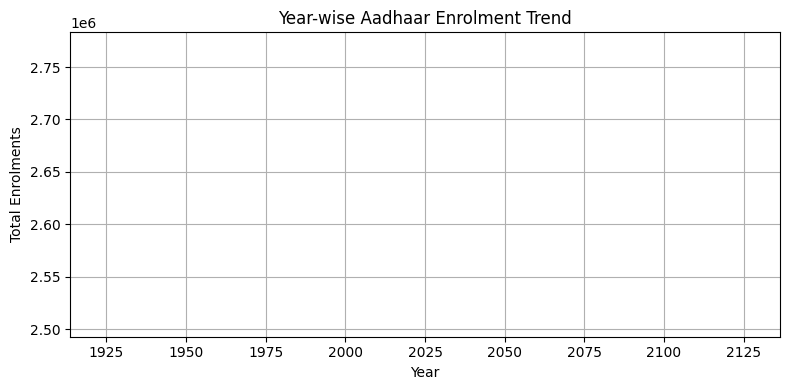

In [14]:
yearly_enrol = enrolment_df.groupby("year")["total_enrolments"].sum()

yearly_enrol.plot(figsize=(8, 4))
plt.title("Year-wise Aadhaar Enrolment Trend")
plt.xlabel("Year")
plt.ylabel("Total Enrolments")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, "enrolment_trend_yearly.png"))
plt.show()

### Plot 3: Biometric Updates by Age Group

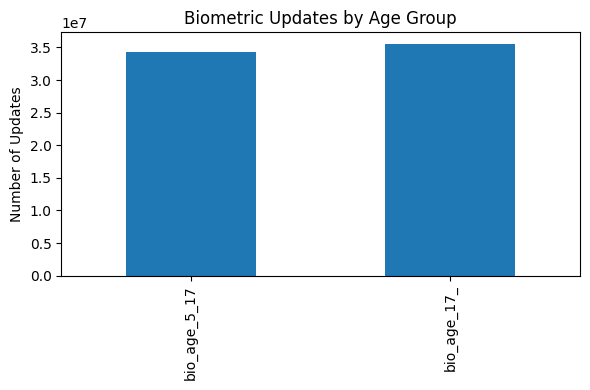

In [15]:
bio_age = biometric_df[["bio_age_5_17", "bio_age_17_"]].sum()

bio_age.plot(kind="bar", figsize=(6, 4))
plt.title("Biometric Updates by Age Group")
plt.ylabel("Number of Updates")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, "biometric_updates_age.png"))
plt.show()

### Plot 4: Demographic Updates Over Time

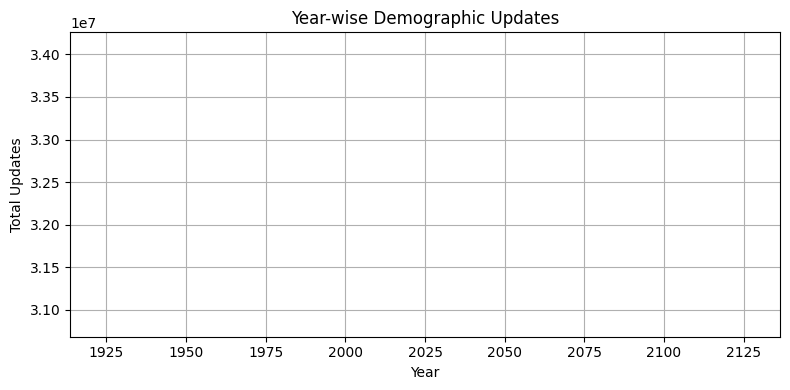

In [16]:
demo_yearly = demographic_df.groupby("year")["total_demographic_updates"].sum()

demo_yearly.plot(figsize=(8, 4))
plt.title("Year-wise Demographic Updates")
plt.xlabel("Year")
plt.ylabel("Total Updates")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, "demographic_updates_trend.png"))
plt.show()

### Plot 5: Enrolment vs Update Behaviour (District Level)

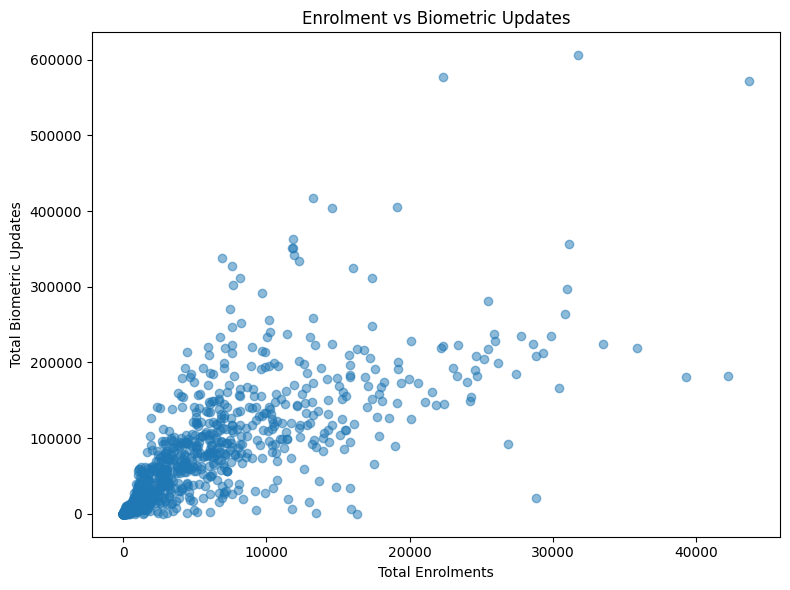

In [17]:
# Prepare merged dataset
bio_district = biometric_df.groupby(["state", "district"], as_index=False)["total_biometric_updates"].sum()
demo_district = demographic_df.groupby(["state", "district"], as_index=False)["total_demographic_updates"].sum()
enrol_district = enrolment_df.groupby(["state", "district"], as_index=False)["total_enrolments"].sum()

merged = enrol_district.merge(bio_district, on=["state", "district"]).merge(
    demo_district, on=["state", "district"]
)

plt.figure(figsize=(8, 6))
plt.scatter(
    merged["total_enrolments"],
    merged["total_biometric_updates"],
    alpha=0.5
)
plt.xlabel("Total Enrolments")
plt.ylabel("Total Biometric Updates")
plt.title("Enrolment vs Biometric Updates")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, "enrolment_vs_biometric.png"))
plt.show()

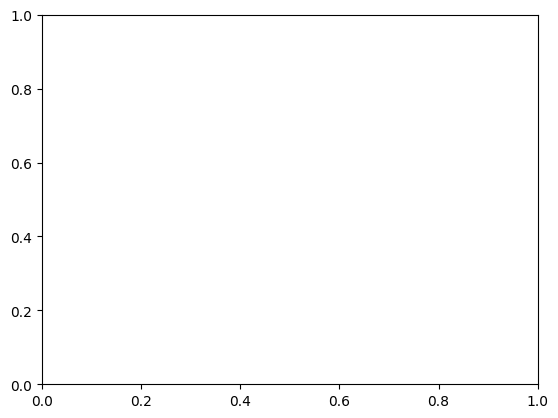

In [18]:
plt.ticklabel_format(style='plain', axis='y')

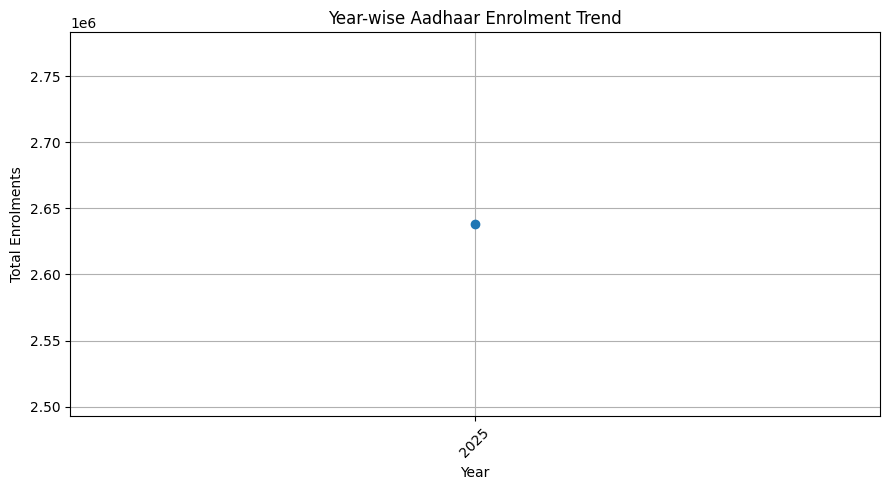

In [19]:
yearly_enrol = enrolment_df.groupby("year")["total_enrolments"].sum().reset_index()

plt.figure(figsize=(9, 5))
plt.plot(
    yearly_enrol["year"],
    yearly_enrol["total_enrolments"],
    marker="o"
)

plt.title("Year-wise Aadhaar Enrolment Trend")
plt.xlabel("Year")
plt.ylabel("Total Enrolments")

plt.xticks(yearly_enrol["year"], rotation=45)
plt.grid(True)

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, "enrolment_trend_yearly.png"))
plt.show()

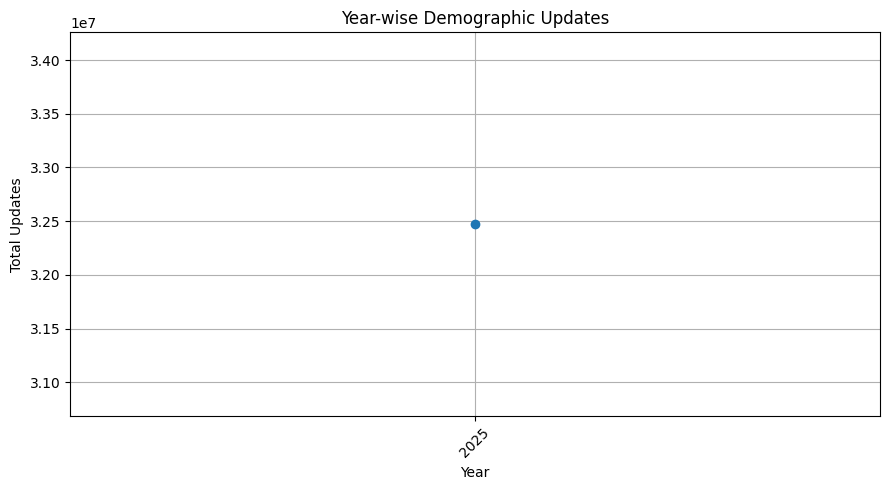

In [20]:
demo_yearly = demographic_df.groupby("year")["total_demographic_updates"].sum().reset_index()

plt.figure(figsize=(9, 5))
plt.plot(
    demo_yearly["year"],
    demo_yearly["total_demographic_updates"],
    marker="o",
    linestyle="-"
)

plt.title("Year-wise Demographic Updates")
plt.xlabel("Year")
plt.ylabel("Total Updates")

plt.xticks(demo_yearly["year"], rotation=45)
plt.grid(True)

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, "demographic_updates_trend.png"))
plt.show()

In [21]:
print(yearly_enrol)
print(demo_yearly)

     year  total_enrolments
0  2025.0         2637993.0
     year  total_demographic_updates
0  2025.0                 32471759.0


### Final Visualisation Summary
- Generated clean, publication-quality visualisations
- Saved figures for inclusion in the final PDF report
- Focused on clarity, interpretability, and policy relevance

All figures are stored in the `outputs/figures/` directory.